# CPSC-5616EL: Regularization (Diabetes dataset)

This program will load the[ diabetes dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html), split it into training and testing sets, apply Ridge Regression (L2 regularization) with different values of the regularization parameter lambda [0.001, 0.01, 0.1, 1, 10, 100], compute the mean squared error for training and testing sets for each value of lambda, and finally plot the training and testing errors against the alpha values.

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646       0  
1 -0.039493 -0.068332 -0.092204       0  
2 -0.002592  0.002861 -0.025930       0  
3  0.034309  0.022688 -0.009362       1  
4 -0.002592 -0.031988 -0.046641       0  
dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
Feature's name: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


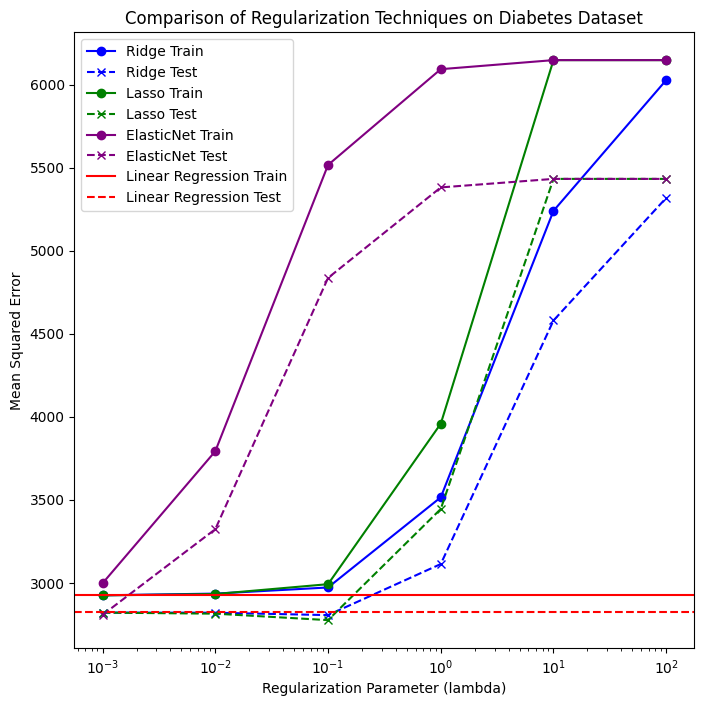

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Loading the diabetes dataset
data = load_diabetes()

# Convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
# "Median Income" feature to predict if the house value is above or below the median
df['target'] = (data.target > np.mean(data.target)).astype(int)  # Convert to binary classification
print(df.head())

X = data.data
y = data.target

print(data.keys())
print("Feature's name:", data['feature_names'])

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Training the LinearRegression model
lin_reg = LinearRegression().fit(X_train, y_train)
lin_reg_train_error = mean_squared_error(y_train, lin_reg.predict(X_train))
lin_reg_test_error = mean_squared_error(y_test, lin_reg.predict(X_test))


# Defining the regularization parameters
lambdas = [0.001, 0.01, 0.1, 1, 10, 100]
models = {'Ridge': Ridge, 'Lasso': Lasso, 'ElasticNet': ElasticNet}

# Storing errors for each model and lambda
errors = {model_name: {'train': [], 'test': []} for model_name in models}

# Applying each regularization model for each lambda
for model_name, Model in models.items():
    for lambda_ in lambdas:
        if model_name == 'ElasticNet':
            model = Model(alpha=lambda_, l1_ratio=0.5)  # l1_ratio=0.5 means equal L1 and L2 regularization
        else:
            model = Model(alpha=lambda_)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        errors[model_name]['train'].append(mean_squared_error(y_train, y_train_pred))
        errors[model_name]['test'].append(mean_squared_error(y_test, y_test_pred))

# Plotting the results
model_colors = {'Ridge': 'blue', 'Lasso': 'green', 'ElasticNet': 'purple'}
plt.figure(figsize=(8, 8))

for model_name, error_values in errors.items():
    plt.plot(lambdas, error_values['train'], label=f'{model_name} Train', color=model_colors[model_name], marker='o')
    plt.plot(lambdas, error_values['test'], label=f'{model_name} Test', color=model_colors[model_name], linestyle='--', marker='x')

# Adding the LinearRegression MSE to the plot
plt.axhline(y=lin_reg_train_error, color='red', linestyle='-', label='Linear Regression Train')
plt.axhline(y=lin_reg_test_error, color='red', linestyle='--', label='Linear Regression Test')

plt.xscale('log')
plt.xlabel('Regularization Parameter (lambda)')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Regularization Techniques on Diabetes Dataset')
plt.legend()
plt.show()


When applying L2 regularization (or Ridge Regression) with increasing values of the regularization parameter/strength (λ), the model becomes more constrained. As the regularization strength increases:

**Bias increases**: The coefficients of the model tend to shrink towards zero. As a result, the model becomes less flexible and might underfit the data.

**Variance decreases**: With higher λ, the model will likely have less variance across different training sets. This means it becomes more stable but possibly at the cost of accuracy.

So, as λ increases, the model simplifies, which can lead to ** increased error on the training dataset**, especially if the original model without regularization was complex enough to capture the underlying data patterns.

**If the training error is much lower than the testing error, it might indicate overfitting**. The model has learned the training data "too well", including its noise and outliers, and performs poorly on new data. **Regularization is one of the techniques to prevent overfitting by adding a penalty to the complexity of the model**. As we increase the regularization strength λ, both training and testing errors might initially decrease, but after a certain point, they might start to increase as the model becomes overly simplified and starts underfitting the data.

# Choosing the model based on their MSE
Step-by-step process to determine the best model based on their MSE output:

1. **Examine Test Error**:
    - Among the curves for Ridge, Lasso, and ElasticNet on the plot, identify which model gives the **lowest test error** at any given \(\lambda\). This represents how well the model generalizes to unseen data.

2. **Evaluate Overfitting**:
    - For the model(s) identified in step 1, observe the gap between its training and test curves. If there's a **small gap**, it indicates less overfitting. A bigger gap, **especially with a low training error and high test error**, indicates potential overfitting.

3. **Stability**:
    - Does any model consistently perform well across various \(\lambda\) values? A model that's more stable across different regularization strengths can be more reliable.

Based on the above steps:
- **Choose the model** that has the lowest test error, exhibits less overfitting, and shows consistent performance across different \(\lambda\) values.

Using these guidelines, you can identify which regularization technique (Ridge, Lasso, or ElasticNet) works best for the diabetes dataset.

For the model(s) identified in step 1, observe the gap between its training and test curves. If there's a small gap, it indicates less overfitting. A bigger gap, especially with a low training error and high test error, indicates potential overfitting.

The following code is **just for illustration** of plotting ONE feature using L1 regularization.

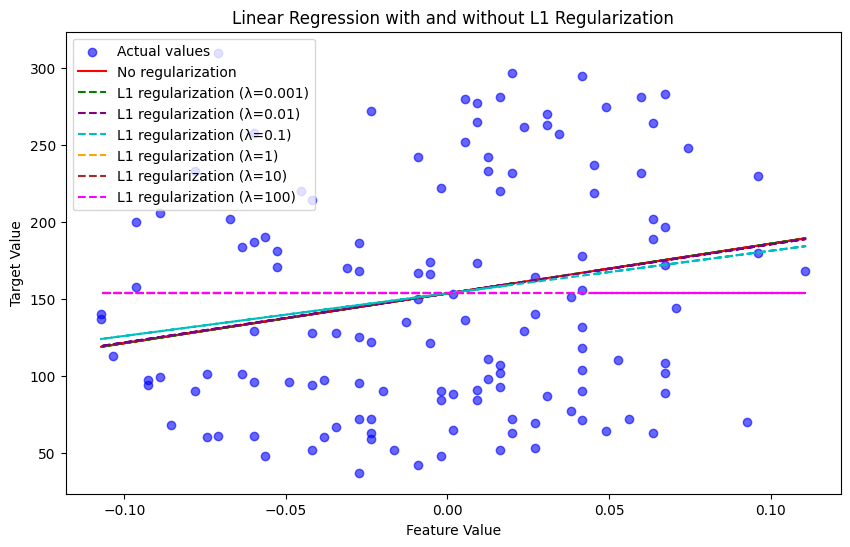

In [ ]:
# For simplicity, we'll choose just one feature for visualization
# Let's take the first feature as an example
X_train_1D = X_train[:, 0].reshape(-1, 1)
X_test_1D = X_test[:, 0].reshape(-1, 1)

# Training Linear Regression without regularization
lin_reg = LinearRegression()
lin_reg.fit(X_train_1D, y_train)
y_pred_no_reg = lin_reg.predict(X_test_1D)

lambdas = [0.001, 0.01, 0.1, 1, 10, 100]

plt.figure(figsize=(10, 6))

# Plotting actual vs. predicted for no regularization
plt.scatter(X_test_1D, y_test, color='b', label='Actual values', alpha=0.6)
plt.plot(X_test_1D, y_pred_no_reg, color='r', label='No regularization')

colors = ['g', 'purple', 'c', 'orange', 'brown', 'magenta']

# Iterating through each lambda and plotting the results
for i, lambda_ in enumerate(lambdas):
    lasso = Lasso(alpha=lambda_)
    lasso.fit(X_train_1D, y_train)
    y_pred = lasso.predict(X_test_1D)
    plt.plot(X_test_1D, y_pred, color=colors[i], linestyle='--', label=f'L1 regularization (λ={lambda_})')

plt.xlabel('Feature Value')
plt.ylabel('Target Value')
plt.title('Linear Regression with and without L1 Regularization')
plt.legend()

plt.show()

# TODO:

Try Ridge + ElasticNet both lambda = 0.1